In [4]:
import oritelib as orite
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Import fasta seq
seq = orite.seq_from_fasta('test_data/exciting_bacteria/Porphyromonas_gingivalis_L3_FASTA.fasta')


In [6]:
# Max rotate 

max_things = orite.max_rotate_seq_and_skew_calc(seq)

max_cg = max_things[0]
max_cgc = max_things[1]
max_fasta = max_things[2]
max_offset = max_things[3]


inital max gc skew indx 1093354
max cgc skew indx 2343475


In [7]:
# Z - curve
xn, yn, zn = orite.calc_z_curve(max_fasta)

RY = xn
KM = yn

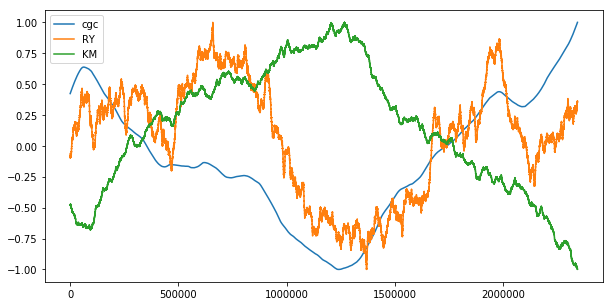

In [8]:
# Normalize skews 
cgc_scaled = orite.scale_skew(max_cgc)
RY_scaled = orite.scale_skew(RY)
KM_scaled = orite.scale_skew(KM)

plt.figure(figsize=[10,5])
plt.plot(cgc_scaled, label='cgc')
plt.plot(RY_scaled, label='RY')
plt.plot(KM_scaled, label='KM')
plt.legend()


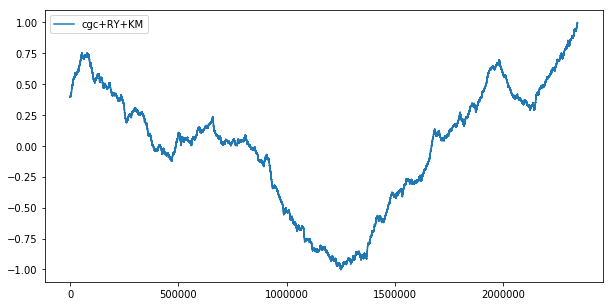

In [9]:
# sum all three (neg of RY)
cgc_ry_km = orite.scale_skew(cgc_scaled + RY_scaled - KM_scaled)
plt.figure(figsize=[10,5])
plt.plot(cgc_ry_km, label = 'cgc+RY+KM')
plt.legend()

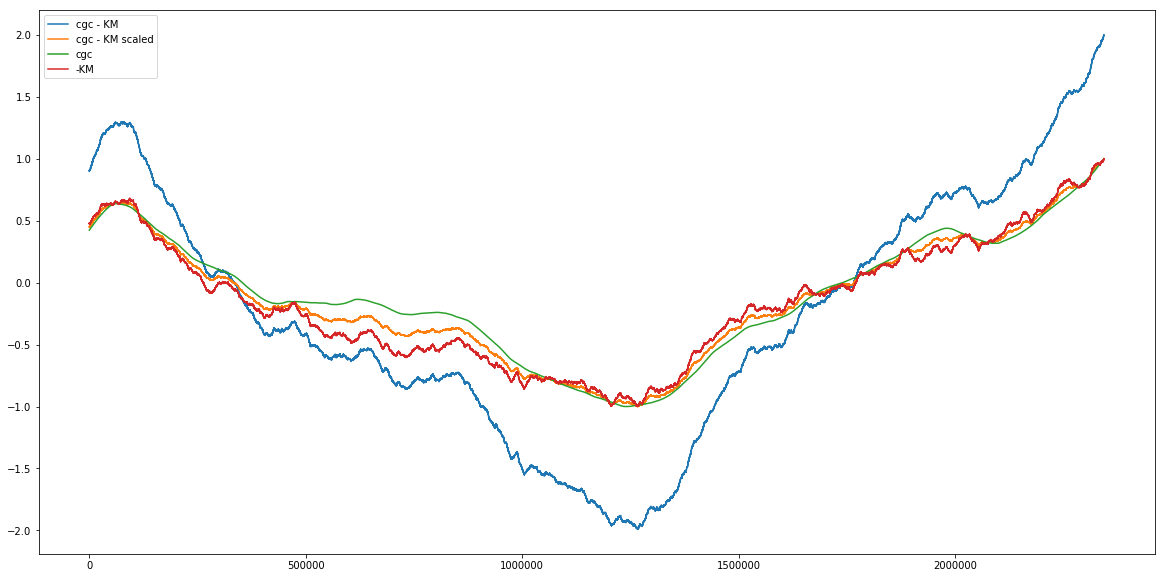

In [10]:
# sum cgc w. -1*KM 
cgc_km = cgc_scaled - KM_scaled
cgc_km_scaled = orite.scale_skew(cgc_scaled - KM_scaled)

plt.figure(figsize=[20,10])


plt.plot(cgc_km, label='cgc - KM')
plt.plot(cgc_km_scaled, label='cgc - KM scaled')
plt.plot(cgc_scaled, label='cgc')
plt.plot((-1)*KM_scaled, label='-KM')
plt.legend()

In [11]:
# Lets try moving on with a score curve of: (CGC_SCALED - KM_SCALED)_SCALED
score_curve = orite.scale_skew(cgc_scaled - KM_scaled) 

# Now we have a skew made of two skews that idealy gives us a better score value.... 

In [12]:
# EXTRACT GENBANK INFORMATION and get all non coding regions with scores taken from the score-curve


g = orite.genbank_to_non_coding_intervals('test_data/exciting_bacteria/Porphyromonas_gingivalis_L3_GB.gb')

true_nc_intervals = g[0] # - List of touples
true_nc_positions = g[1] # - all NC positions in an arrays
non_coding_plus = g[2] # - nc regions interval touple list - WILL NOT BE USED
non_coding_neg  = g[3] # - nc regions interval touple list - WILL NOT BE USED


all_nc_regions = orite.get_phased_nc_region_list(true_nc_intervals, seq, max_offset, score_curve)
print('total number of intial non coding regions: ', len(all_nc_regions))

total number of intial non coding regions:  1720


In [14]:
all_nc_regions[0].sequence

'AGCAGGTCTTT'

In [15]:
# step 7 in workflow
# Compute kmers freqs for all regions and for many kmer lengths 

kmer_lengths_of_interrest = [6,7,8,9]

all_nc_regions = orite.calc_kmers_from_region_list(all_nc_regions, kmer_lengths_of_interrest)


In [16]:
all_nc_regions[1].kmer_info

{6: [('TACGAC', [1, 72]),
  ('ATACGA', [1, 71]),
  ('GATACG', [1, 70]),
  ('GGATAC', [1, 69]),
  ('AGGATA', [1, 68]),
  ('AAGGAT', [1, 67]),
  ('GAAGGA', [1, 66]),
  ('CGAAGG', [1, 65]),
  ('ACGAAG', [1, 64]),
  ('AACGAA', [1, 63]),
  ('AAACGA', [1, 62]),
  ('TAAACG', [1, 61]),
  ('CTAAAC', [1, 60]),
  ('CCTAAA', [1, 59]),
  ('CCCTAA', [1, 58]),
  ('CCCCTA', [1, 57]),
  ('ACCCCT', [1, 56]),
  ('AACCCC', [1, 55]),
  ('AAACCC', [1, 54]),
  ('TAAACC', [1, 53]),
  ('ATAAAC', [1, 52]),
  ('AATAAA', [1, 51]),
  ('CAATAA', [1, 50]),
  ('TCAATA', [1, 49]),
  ('GTCAAT', [1, 48]),
  ('TGTCAA', [1, 47]),
  ('TTGTCA', [1, 46]),
  ('TTTGTC', [1, 45]),
  ('CTTTGT', [1, 44]),
  ('TCTTTG', [1, 43]),
  ('ATCTTT', [1, 42]),
  ('TATCTT', [1, 41]),
  ('TTATCT', [1, 40]),
  ('TTTATC', [1, 39]),
  ('CTTTAT', [1, 38]),
  ('TCTTTA', [1, 37]),
  ('CTCTTT', [1, 36]),
  ('TCTCTT', [1, 35]),
  ('TTCTCT', [1, 34]),
  ('CTTCTC', [1, 33]),
  ('ACTTCT', [1, 32]),
  ('GACTTC', [1, 31]),
  ('GGACTT', [1, 30]),
  ('GGGA

In [17]:
# Filter out all nc regions belowe 50 in base length 
long_enough_regions = orite.filter_regions_by_length(all_nc_regions, 50)

print('number of nc regions above 50 in length: ', len(long_enough_regions))

number of nc regions above 50 in length:  1090


In [18]:
all_nc_regions[1].kmer_info

{6: [('TACGAC', [1, 72]),
  ('ATACGA', [1, 71]),
  ('GATACG', [1, 70]),
  ('GGATAC', [1, 69]),
  ('AGGATA', [1, 68]),
  ('AAGGAT', [1, 67]),
  ('GAAGGA', [1, 66]),
  ('CGAAGG', [1, 65]),
  ('ACGAAG', [1, 64]),
  ('AACGAA', [1, 63]),
  ('AAACGA', [1, 62]),
  ('TAAACG', [1, 61]),
  ('CTAAAC', [1, 60]),
  ('CCTAAA', [1, 59]),
  ('CCCTAA', [1, 58]),
  ('CCCCTA', [1, 57]),
  ('ACCCCT', [1, 56]),
  ('AACCCC', [1, 55]),
  ('AAACCC', [1, 54]),
  ('TAAACC', [1, 53]),
  ('ATAAAC', [1, 52]),
  ('AATAAA', [1, 51]),
  ('CAATAA', [1, 50]),
  ('TCAATA', [1, 49]),
  ('GTCAAT', [1, 48]),
  ('TGTCAA', [1, 47]),
  ('TTGTCA', [1, 46]),
  ('TTTGTC', [1, 45]),
  ('CTTTGT', [1, 44]),
  ('TCTTTG', [1, 43]),
  ('ATCTTT', [1, 42]),
  ('TATCTT', [1, 41]),
  ('TTATCT', [1, 40]),
  ('TTTATC', [1, 39]),
  ('CTTTAT', [1, 38]),
  ('TCTTTA', [1, 37]),
  ('CTCTTT', [1, 36]),
  ('TCTCTT', [1, 35]),
  ('TTCTCT', [1, 34]),
  ('CTTCTC', [1, 33]),
  ('ACTTCT', [1, 32]),
  ('GACTTC', [1, 31]),
  ('GGACTT', [1, 30]),
  ('GGGA

In [19]:
# Pre filter out regions with kmer occurances 
regions_3_and_more_occ = orite.filter_region_list_by_kmer_occurence(long_enough_regions, 3)
print('number of nc regions with kmers  having 3 or more occurances: ', len(regions_3_and_more_occ))



number of nc regions with kmers  having 3 or more occurances:  427


In [22]:
regions_3_and_more_occ[4].kmer_info

{6: [('TATATA', [7, 373, 395, 417, 419, 441, 463, 740]),
  ('TAAATA', [5, 273, 467, 636, 910, 962]),
  ('ATAAAT', [4, 422, 466, 635, 639]),
  ('TATAAA', [4, 421, 465, 504, 634]),
  ('ATATAA', [4, 420, 464, 503, 633]),
  ('ATATAT', [4, 374, 418, 739, 949]),
  ('GTATAT', [4, 372, 440, 462, 682]),
  ('TTTCAA', [4, 241, 299, 387, 614]),
  ('GTTTTC', [4, 239, 297, 407, 612]),
  ('TTCGAT', [4, 173, 360, 410, 454]),
  ('GGAGAG', [3, 494, 569, 677]),
  ('TGTTTG', [3, 489, 603, 772]),
  ('TTTGTA', [3, 437, 459, 954]),
  ('ATTTGT', [3, 436, 458, 953]),
  ('TCGATT', [3, 411, 455, 522]),
  ('GATCGT', [3, 403, 447, 700]),
  ('TATATT', [3, 375, 683, 950]),
  ('TGTATA', [3, 371, 439, 461]),
  ('AAATAA', [3, 274, 637, 963]),
  ('AATCAT', [3, 265, 425, 896]),
  ('TTTTCA', [3, 240, 298, 613]),
  ('CGAAAA', [3, 219, 815, 864]),
  ('ATATTT', [3, 211, 684, 951]),
  ('GAAAAT', [3, 207, 220, 816]),
  ('TCGTTT', [3, 161, 405, 758]),
  ('ATTTGC', [3, 120, 557, 820]),
  ('GAGACA', [3, 65, 511, 921]),
  ('AAGGTA

In [23]:
regions_3_and_more_occ_with_density = orite.calc_density_for_region_list(region_list=regions_3_and_more_occ)

In [25]:
regions_3_and_more_occ_with_density[4].kmer_info

{6: [('TATATA', [7, 373, 395, 417, 419, 441, 463, 740], 0.01907356948228883),
  ('TAAATA', [5, 273, 467, 636, 910, 962], 0.00725689404934688),
  ('ATAAAT', [4, 422, 466, 635, 639], 0.018433179723502304),
  ('TATAAA', [4, 421, 465, 504, 634], 0.018779342723004695),
  ('ATATAA', [4, 420, 464, 503, 633], 0.018779342723004695),
  ('ATATAT', [4, 374, 418, 739, 949], 0.006956521739130435),
  ('GTATAT', [4, 372, 440, 462, 682], 0.012903225806451613),
  ('TTTCAA', [4, 241, 299, 387, 614], 0.010723860589812333),
  ('GTTTTC', [4, 239, 297, 407, 612], 0.010723860589812333),
  ('TTCGAT', [4, 173, 360, 410, 454], 0.014234875444839857),
  ('GGAGAG', [3, 494, 569, 677], 0.01639344262295082),
  ('TGTTTG', [3, 489, 603, 772], 0.01060070671378092),
  ('TTTGTA', [3, 437, 459, 954], 0.005802707930367505),
  ('ATTTGT', [3, 436, 458, 953], 0.005802707930367505),
  ('TCGATT', [3, 411, 455, 522], 0.02702702702702703),
  ('GATCGT', [3, 403, 447, 700], 0.010101010101010102),
  ('TATATT', [3, 375, 683, 950], 0.0

In [ ]:
#orite.plot_region_list(region_list=regions_3_and_more_occ, curve=score_curve)

In [28]:
regions_overlapp_removed = orite.remove_overlapping_kmers_from_region_list(regions_3_and_more_occ_with_density)
print('number of nc regions with kmers without overlapping kmers: ', len(regions_3_and_more_occ))

number of nc regions with kmers without overlapping kmers:  427


In [37]:
for i in range(len(regions_overlapp_removed)):
    print('region: ', i, '\n', regions_overlapp_removed[i].kmer_info)
    print()

region:  0 
 {6: [('TCAGAT', [3, 171, 267, 370], 0.01507537688442211), ('AACCAA', [3, 147, 182, 243], 0.03125), ('TGCTCT', [3, 127, 176, 272], 0.020689655172413793), ('CCCTCT', [3, 99, 156, 252], 0.0196078431372549), ('ACCCTC', [3, 98, 155, 251], 0.0196078431372549), ('ATGCTC', [3, 12, 175, 271], 0.011583011583011582)], 7: [('ACCCTCT', [3, 98, 155, 251], 0.0196078431372549)]}

region:  1 
 {6: [('GCTCTG', [4, 701, 899, 1049, 1055], 0.011299435028248588), ('GCTTGA', [4, 235, 292, 523, 886], 0.006144393241167435), ('GGCTCT', [3, 700, 1048, 1054], 0.00847457627118644), ('CATACT', [3, 396, 449, 722], 0.009202453987730062), ('TCATAC', [3, 395, 721, 785], 0.007692307692307693), ('GCAGAG', [3, 374, 530, 1023], 0.004622496147919877), ('GTATTG', [3, 343, 706, 849], 0.005928853754940711), ('TCGGTC', [3, 273, 462, 604], 0.00906344410876133), ('GCCTCG', [3, 250, 411, 459], 0.014354066985645933), ('TGATGT', [3, 238, 499, 653], 0.007228915662650603), ('TTGATG', [3, 237, 498, 525], 0.0104166666666666

 {6: [('TTTTGG', [4, 58, 164, 262, 404], 0.011560693641618497), ('GGAGCA', [4, 2, 68, 101, 413], 0.009732360097323601), ('AGGAGA', [3, 475, 502, 554], 0.0379746835443038), ('AGGTTT', [3, 235, 259, 334], 0.030303030303030304), ('GGCGCA', [3, 212, 326, 347], 0.022222222222222223), ('GTTTTG', [3, 150, 261, 403], 0.011857707509881422), ('GGTTTT', [3, 149, 236, 260], 0.02702702702702703), ('GGGACA', [3, 80, 170, 307], 0.013215859030837005), ('TTGGTG', [3, 60, 222, 357], 0.010101010101010102), ('AATTGG', [3, 11, 355, 548], 0.00558659217877095)]}

region:  366 
 {6: [('CAAATA', [3, 202, 283, 298], 0.03125)]}

region:  367 
 {6: [('AGCAAA', [4, 243, 306, 357, 426], 0.02185792349726776), ('CAAAAA', [3, 275, 308, 535], 0.011538461538461539), ('AAAATC', [3, 160, 246, 279], 0.025210084033613446), ('AATCAT', [3, 45, 339, 509], 0.00646551724137931), ('AAATCA', [3, 44, 161, 280], 0.012711864406779662), ('AATTTC', [3, 33, 264, 515], 0.006224066390041493), ('TAATTT', [3, 32, 58, 514], 0.006224066390041